In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Settings

In [13]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [14]:
loni=360-70
lonf=360-23

In [5]:
data = xr.open_dataset('./data/RG_Global_Jan2004_Dic2023.nc')

## Extract data

In [25]:
data24N = data.interp(lat=[24.5], method="nearest").interp(lon=np.arange(loni,lonf,0.5), method="linear").squeeze('lat').drop_vars('lat')

In [26]:
data24N_2000 = data24N.interp(pre = np.arange(10,1900,10), method="linear")

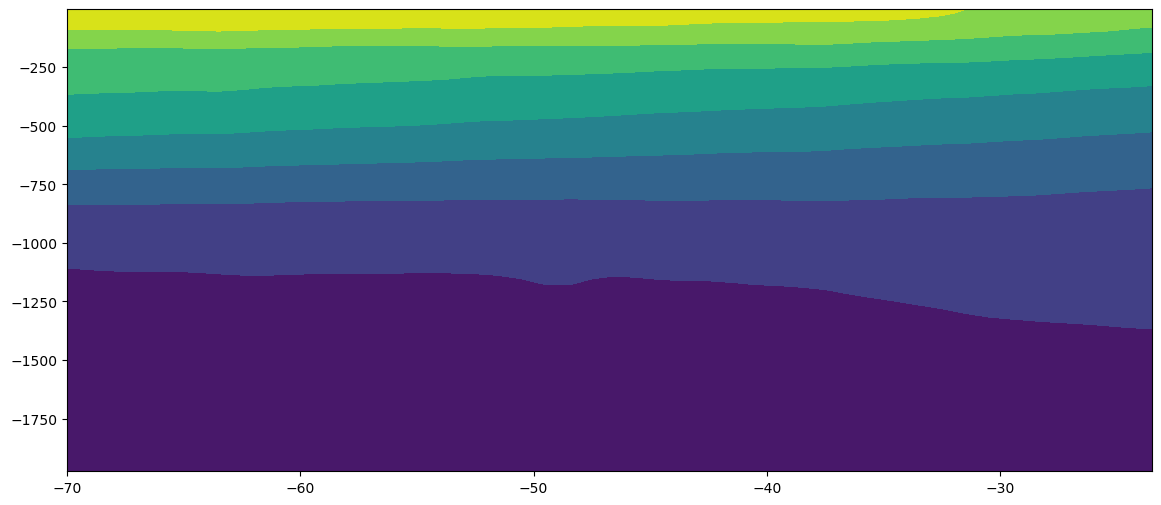

In [28]:
ig, ax = plt.subplots(figsize = (14,6))
ax.contourf(data24N_2000.temperature.lon-360,-data24N.temperature.pre,data24N.temperature.mean('time'))

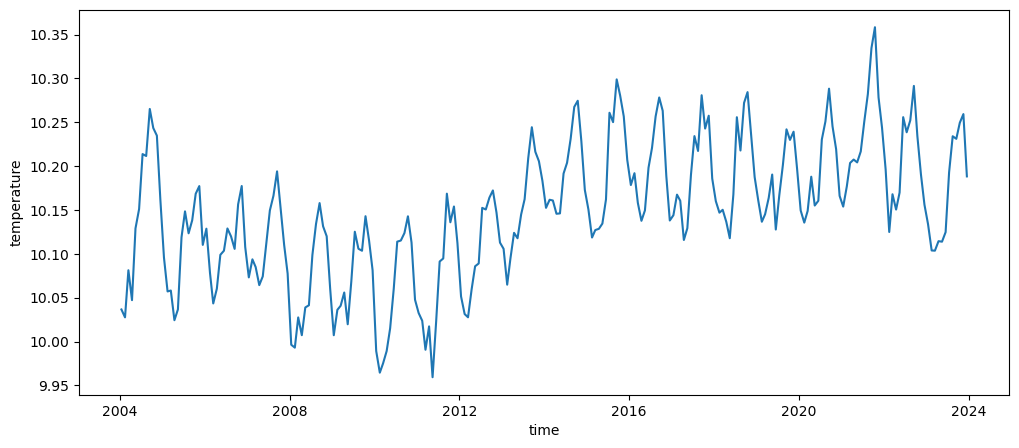

In [29]:
data24N_2000.temperature.mean('pre').mean('lon').plot()

In [31]:
data24N.to_netcdf('./Data/RG_interp_24N.nc')